# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Dr. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>


----
#### <center>RA, Turma e nome dos componentes do grupo</center>

    
| RA       | Turma        |      Nome     | 
|:-        |:-            |:-------------:|
| 210058   | CP701TIN1    | Andressa Braga Vieira Rodrigues |  
| 211202   | CP701TIN1    | Diogo Vital Vieira              |  
| 210395   | CP701TIN1    | Gabriel Coelho Crispi           |  
    

----
### Instruções

**1**. Leia atentamente esta seção e as descrições de cada exercício para garantir que você está executando o que foi pedido.
- O não atendimento de qualquer item descrito, implicará perda de nota.

**2**. O trabalho pode ser feito em grupos de até 5 pessoas.
 - Apenas uma pessoa do grupo deve submeter o trabalho. 
 - Você deve submeter apenas o arquivo .ipynb.
 - O grupo poderá ser composto por pessoas de qualquer uma das três turmas de processamento de imagens
 
**3**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções
- comentar o código sempre que necessário

**4**. Cuidado com plágio. Se for detectado plágio entre grupos, a punição será dada para todos os componentes dos grupos envolvidos. 

**5**. Antes de submeter o notebook, certifique-se que não há erros de código. Uma forma de se certificar disso é usar a opção **"Reiniciar Kernel e executar todas as células"** do Jupyter ou a opção **"Reiniciar e executar tudo"** do Google Colab. 

**6**. A única biblioteca de processamento de imagens permitida neste trabalho é a **OpenCV**. Porém, alguns exercícios poderão limitar algumas funções dessa biblioteca que poderão ser usadas. 
- Mesmo nos exercícios que limitam o uso de funções da OpenCV, considere que as operações básicas como abrir, transformar para outro formato de cor e salvar, podem ser feitas com as funções da biblioteca.

**7**. Em todos os exercícios que pedirem para salvar a imagem resultante, tome cuidado de converter a imagem para BGR antes de salvá-la pois esse é o formato padrão da biblioteca OpenCV. Caso contrário, os canais de cores da imagem resultante ficarão trocados. 

**8**. Em todos os exercícios, plote na tela as mesmas imagens que o exercício pedir para salvar. 
- Não é permitido usar a função cv2.imshow() para plotar as imagens. Essa regra é para evitar incompatibilidade e prejudicar a correção. Sempre use a biblioteca matplotlib.

**9**. Em todos os exercícios, as imagens finais solicitadas devem estar no formato **uint8**.

**10**. Em todos os exercícios você deve tratar tons de cinza inválidos usando a técnica de saturação, há não ser que seja explicitamente pedida outra técnica. Sempre tome cuidado para que as operações executadas não causem desequilíbrio de cores.

----
## Preparação 

Abaixo são inicializadas as bibliotecas e é definido o caminho das pasta **figs** onde estão as imagens usadas em cada exercício. É definido também o caminho da pasta **figs_resultado**, onde você deve salvar as imagens resultantes. 

Se for necessário, você pode alterar a variável que define esse caminho, porém use ela em todos os exercícios. 

In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

pathFigs = "figs/" # path das imagens que devem ser usadas
pathRes = "figs_resultado/" # path da pasta onde as imagens devem ser salvas

# Cria uma pasta onde as imagens devem ser salvas, se ela não existir
if not os.path.isdir(pathRes):
    os.mkdir(pathRes)

----
## Exercicio 1
Faça uma função que receba dois parâmetros:
 - **imagem1**: uma imagem monocromática ou RGB
 - **imagem2**: uma imagem do mesmo tamanho que a imagem anterior, mas que seja toda preta e que possua apenas um retângulo na cor branca
    
Essa função deve retornar qual a quantidade mínima total de bytes que seria necessário para representar a região da **imagem1** que está localizada na mesma posição do retângulo da **imagem2**.

Teste sua função usando as imagens **figs/natureza.jpeg** e **figs/natureza_regiao.jpeg**.

Obs: não é permitido usar nenhuma função pronta da biblioteca OpenCV. 

In [9]:
def calcula_bytes(imagem1, imagem2):
    # Carregar as imagens
    img1 = plt.imread(imagem1)
    img2 = plt.imread(imagem2)

    # Converter a imagem2 para escala de cinza
    img2_gray = np.dot(img2[...,:3], [0.2989, 0.5870, 0.1140])

    # Criar uma máscara binária da imagem2
    mascara = img2_gray > 1

    # Extrair a região de interesse da imagem1
    roi = img1 * np.dstack((mascara, mascara, mascara))

    # Calcular o número total de bytes
    total_bytes = np.sum(mascara) * 3

    return total_bytes

# Testar a função
imagem1 = 'figs/natureza.jpeg'
imagem2 = 'figs/natureza_regiao.jpeg'
print(calcula_bytes(imagem1, imagem2))

104538


----
## Exercicio 2

Use as imagens **figs/procurado.jpg** e **figs/tripaSeca.png** para criar um cartaz de procurado igual ao apresentado na imagem na imagem **figs/tripaSeca_procurado.png**.

Você pode aplicar qualquer técnica aprendida na disciplina e qualquer sequência de operações para chegar no resultado esperado. Porém, sugere-se a seguinte sequência:
- Remova o texto do cartaz usando máscara de cor, conforme ensinado no notebook de operações aritméticas. Porém, em vez de aplicar na imagem inteira, selecione apenas a região onde está o texto para facilitar. 
- Ao remover o texto, ficarão marcas do texto antigo. Para removê-las, aplique algum filtro passa-baixa. 
- Adicione o texto novo usando a função putText da OpenCV
- Aplique um novo filtro passa-baixa para que a imagem do cartaz fique um pouco borrada de forma a similar a foto do personagem. 
- Aumente a imagem **figs/tripaSeca.png** para o rosto do personagem caber na região adequada da imagem **figs/procurado.jpg**. 
- Aplique equalização no rosto do personagem
- Adicione o rosto do personagem no cartaz

Salve a imagem resultante no caminho **figs_resultado/ex02_tripaSeca_procurado.png**

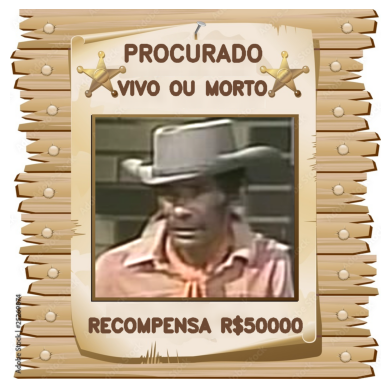

True

In [28]:
imgCartaz0 = cv2.imread("figs/procurado.jpg")
imgCartaz = cv2.cvtColor(imgCartaz0, cv2.COLOR_BGR2RGB)
imgTripaSeca0 = cv2.imread("figs/tripaSeca.png")
imgTripaSeca = cv2.cvtColor(imgTripaSeca0, cv2.COLOR_BGR2RGB)


def normalizacao(img, crop, threshold, canal, novaCor, blur=(33,33), sigma=14):

  imgRecortada = img[crop[0] : crop[1], crop[2] : crop[3]]

  mask = imgRecortada[:,:, canal] < threshold
  imgRecortada[mask] = novaCor

  imgBlur = cv2.GaussianBlur(imgRecortada, ksize=blur, sigmaX=sigma)

  img[crop[0] : crop[1], crop[2] : crop[3]] = imgBlur

  return img

def adicionar_texto(img, texto, posicao, font_scale, thickness, color):

  cv2.putText(img, texto, posicao, cv2.FONT_HERSHEY_DUPLEX, font_scale, color, thickness)

  return img


#Remover "Wanted"
imgWantedApagado = normalizacao(imgCartaz, crop=(83,181,313,664), threshold=140, canal=0, novaCor=[243,231,217],)

#Adicionar "Procurado"
imgProcurado = adicionar_texto(imgWantedApagado, "PROCURADO", (305, 140), 2, 7, (109,73,51),) 

#Remover "Dead or Alive"
imgDeadApagado = normalizacao(imgProcurado, crop=(205,268,296,687), threshold=140, canal=0, novaCor=[243,231,217],)

#Adicionar "Vivo ou Morto"
imgVivoMorto = adicionar_texto(imgDeadApagado, "VIVO OU MORTO", (290, 230), 1.6, 7, (109,73,51),)

#Remover "Reward $5000"
imgRewardApagado = normalizacao(imgVivoMorto, crop=(795,888,259,749), threshold=140, canal=0, novaCor=[243,231,217],)

#Adicionar "Recompensa R$50000"
imgRecompensa = adicionar_texto(imgRewardApagado,"RECOMPENSA R$50000",(210, 870), 1.6, 7, (109,73,51),)


#Recortar uma região específica da imgTripaSeca
inicioY, fimY = 46, 198
inicioX, fimX = 350, 498
tripaSecaRecortado = imgTripaSeca[inicioY:fimY, inicioX:fimX]

#Calcular novas dimensões para redimensionamento
nova_largura = 766 - 230
nova_altura = 778 - 292

#Redimensionar a imagem recortada
tamanho_novo = (nova_largura, nova_altura)
tripaSecaRecortado = cv2.resize(tripaSecaRecortado, tamanho_novo)

#Ajustar contraste e brilho da imagem
alpha = 1.2  # Fator de contraste
beta = 7     # Valor de brilho
tripaSecaRecortado = cv2.convertScaleAbs(tripaSecaRecortado, alpha=alpha, beta=beta)

#Aplicar desfoque gaussiano
kernel = (5,5)
sigma2 = 0.5
tripaSecaRecortado = cv2.GaussianBlur(tripaSecaRecortado, ksize=kernel, sigmaX=sigma2)

imgRewardApagado[292:778, 230:766] = tripaSecaRecortado


if imgRewardApagado.dtype != 'uint8':
    imgRewardApagado = cv2.convertScaleAbs(imgRewardApagado)


plt.imshow(imgRewardApagado)
plt.axis("off")
plt.show()

imgFinal = cv2.cvtColor(imgRewardApagado, cv2.COLOR_RGB2BGRA)
cv2.imwrite('figs_resultado/ex02_tripaSeca_procurado.png', imgFinal)

----
## Exercicio 3

Remova o ruído da imagem **figs/faculdade.png** usando operações morfológicas. O resultado mínimo esperado é apresentado na imagem **figs/faculdade_corrigida.png**. 

Salve a imagem resultante no caminho **figs_resultado/ex03.png**.

uint8


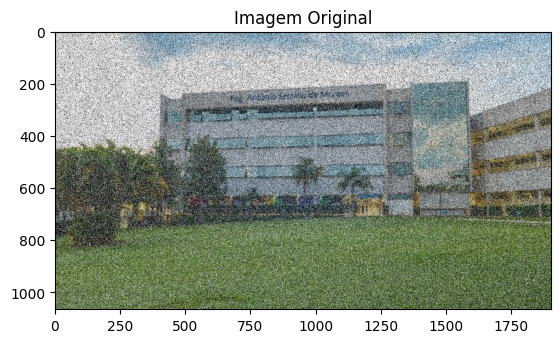

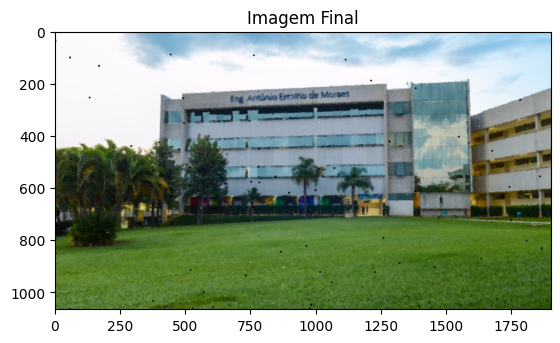

True

In [20]:
img0 = cv2.imread("figs/faculdade.png", cv2.IMREAD_UNCHANGED)
imgOriginal = cv2.cvtColor(img0, cv2.COLOR_BGRA2RGB)

elemEstrut1 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
elemEstrut2 = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))

#Erosao
imgErode = cv2.erode(imgOriginal, elemEstrut1)

#Dilatacao
imgDilate = cv2.dilate(imgOriginal, elemEstrut1)

#Abertura
imgAbertura = cv2.dilate(imgErode, elemEstrut2)

#Combinacao
imgFechamento = cv2.erode(imgAbertura, elemEstrut2)


if imgFechamento.dtype != 'uint8':
    imgFechamento = cv2.convertScaleAbs(imgFechamento)


plt.imshow(imgOriginal)
plt.title('Imagem Original')
plt.show()

plt.imshow(imgFechamento)
plt.title('Imagem Final')
plt.show()

imgFinal = cv2.cvtColor(imgFechamento, cv2.COLOR_RGB2BGRA)
cv2.imwrite('figs_resultado/ex03.png', imgFinal)

----
## Exercicio 4

Crie uma matriz usando a biblioteca numpy. Depois, transforme essa matriz em uma imagem que corresponda a bandeira mostrada na figura **figs/bandeira.png**
 
Para gerar a bandeira, você poderá fazer apenas as seguintes operações:

- operações morfológicas nos símbolos contidos na imagem **figs/simbolos.png**;
- operações aritméticas entre a matriz e os símbolos contidos na imagem **figs/simbolos.png**; 
- operações matriciais, tanto para gerar e transformar cores, quanto para gerar os retângulos que fazem parte da bandeira.

Salve a imagem resultante no caminho **figs_resultado/ex04_bandeira.png**

Obs: as únicas funções prontas da biblioteca OpenCV que podem ser usadas neste exercícios são as que executam operações morfológicas.

True

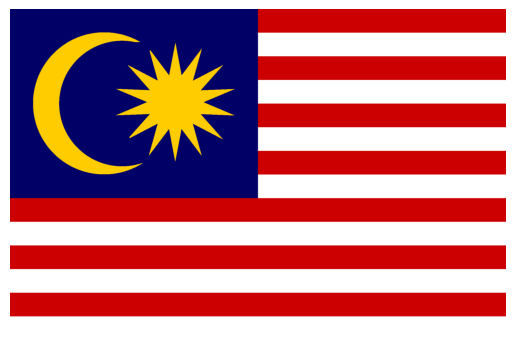

In [21]:
bandeira0 = cv2.imread("figs/bandeira.png")
bandeira = cv2.cvtColor(bandeira0, cv2.COLOR_BGR2RGB)
simbolos = cv2.imread("figs/simbolos.png", cv2.IMREAD_UNCHANGED)
simbolosRGB = cv2.cvtColor(simbolos, cv2.COLOR_BGR2RGBA)


# Função para aplicar uma cor específica a uma imagem
def aplicarCor(img, cor):
    img[np.all(img[:, :, :3] == [0, 0, 0], axis=-1)] = cor

# Cores em formato RGBA
cores = {"Vermelho": [204, 0, 1, 255],"Branco": [255, 255, 255, 255], "Azul": [1, 0, 102, 255], "Amarelo": [255, 204, 0, 255]}

# Criar uma tela branca
imgBandeira = np.full((bandeira.shape[0], bandeira.shape[1], 4), cores["Branco"], dtype=np.uint8)

# Preencher faixas vermelhas
for n in range(0, bandeira.shape[0], 200):
    imgBandeira[n : n + 100, :, :] = cores["Vermelho"]

# Preencher faixa azul
imgBandeira[:800, :1050, :] = cores["Azul"]

# Aplicar a cor amarela aos símbolos
aplicarCor(simbolos, cores["Amarelo"])

# Extrair a lua e estrela
lua = simbolosRGB[15:628, 18:497]
estrela = simbolosRGB[643:, 40:553]

# Dimensões da lua e estrela
altLua, largLua, _ = lua.shape
altEstrela, largEstrela, _ = estrela.shape

for i in range(simbolosRGB.shape[0]):
    for j in range(simbolosRGB.shape[1]):
        if simbolosRGB[i, j, 3] != 0:
            simbolosRGB[i, j, :] = cores["Amarelo"]


# Substituir pixels pretos por azul na lua e na estrela
aplicarCor(lua, cores["Azul"])
aplicarCor(estrela, cores["Azul"])

# Posicionar a lua e estrela na tela
imgBandeira[92 : 92 + altLua, 92 : 92 + largLua] = lua
imgBandeira[140 : 140 + altEstrela, 443 : 443 + largEstrela] = estrela

if imgBandeira.dtype != 'uint8':
    imgBandeira = cv2.convertScaleAbs(imgBandeira)


plt.imshow(imgBandeira)
plt.axis("off")
cv2.imwrite('figs_resultado/ex04_bandeira.png', imgBandeira)


----
## Exercicio 5

Crie uma função que receba uma imagem e modifique ela para que fique quadrada. Se a imagem estiver na orientação paisagem, você precisará adicionar espaço na parte superior e inferior. Da mesma forma, para retrato (mais alto que largo), você adicionará espaço nas laterais. Certifique-se de que seu programa centralize a imagem entre o espaço.

Para preecher o novo espaço, você deverá testar apresentar as duas variações a seguir:
- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preenchê-lo com as $n$ linhas ou colunas vizinhas da imagem. Depois disso, você deverá aplicar uma filtro de média nessa região. 
 - Você deverá criar seu próprio filtro de média. Não é permitido usar nenhuma função pronta para isso. Considere sempre que será criado padding na imagem para que o filtro resulte em uma imagem do mesmo tamanho. Considere também que a máscara sempre será quadrada e com tamanho ímpar. 

- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preencher com a média de todos os valores RGB das $n$ linhas ou colunas vizinhas da imagem.

Teste a função nas imagens **figs/praia.jpg** e **figs/houses.jpg**. 
Salve as imagens resultante nos caminhos **figs_resultado/ex05_praia.png** e **figs_resultado/ex05_houses.png**.

Obs. Neste exercício, não é permitido usar usada nenhuma função pronta da OpenCV. Além disso, as únicas funções prontas do Numpy que podem ser usada são np.pad, np.mean, np.sum, np.ones e np.zeros. 

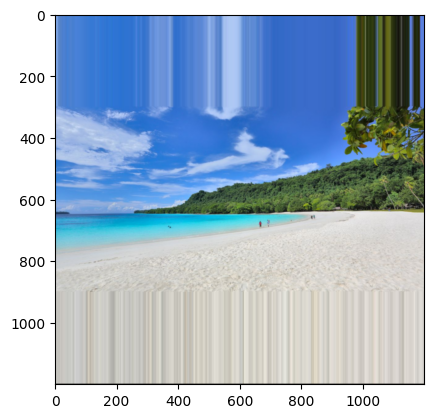

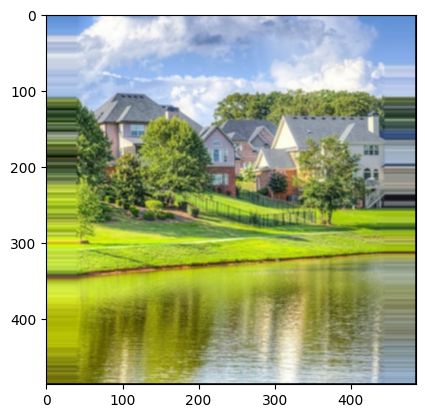

In [24]:
import matplotlib.image as mpimg

def apply_mean_filter(img, kernel_size):
    # Obter as dimensões da imagem
    height, width, _ = img.shape

    # Criar uma nova imagem para armazenar o resultado
    new_img = np.zeros((height, width, 3), dtype=np.uint8)

    # Calcular o raio do kernel
    k = kernel_size // 2

    # Aplicar o filtro de média
    for y in range(k, height - k):
        for x in range(k, width - k):
            for c in range(3):
                new_img[y, x, c] = np.mean(img[y - k:y + k + 1, x - k:x + k + 1, c])

    return new_img

def make_square(img_path, output_path):
    # Carregar a imagem
    img = mpimg.imread(img_path)

    # Obter as dimensões da imagem
    height, width, _ = img.shape

    # Calcular a diferença entre a altura e a largura
    diff = abs(height - width)

    # Verificar se a imagem é retrato ou paisagem
    if height > width:
        # Adicionar espaço nas laterais
        padding = ((0, 0), (diff // 2, diff - diff // 2), (0, 0))
    else:
        # Adicionar espaço na parte superior e inferior
        padding = ((diff // 2, diff - diff // 2), (0, 0), (0, 0))

    # Adicionar o espaço à imagem
    img_padded = np.pad(img, padding, mode='edge')

    # Aplicar o filtro de média
    img_filtered = apply_mean_filter(img_padded, 3)

    # Salvar a imagem resultante
    plt.imsave(output_path, img_filtered)

# Testar a função
make_square('figs/praia.jpg', 'figs_resultado/ex05_praia.png')
make_square('figs/houses.jpg', 'figs_resultado/ex05_houses.png')


# Carregar e exibir a primeira imagem
img1 = plt.imread('figs_resultado/ex05_praia.png')
plt.imshow(img1)
plt.show()

# Carregar e exibir a segunda imagem
img2 = plt.imread('figs_resultado/ex05_houses.png')
plt.imshow(img2)
plt.show()

----
## Exercicio 6

Separe os círculos das linhas na **figs/circulos_retas.png**. Salve as imagens resultantes nos caminhos **figs_resultado/circulo.png** e **figs_resultado/linha.png**. A imagem **figs_resultado/ex06_circulo.png** deve conter apenas círculos e a imagem **figs_resultado/ex06_linha.png** deve conter apenas linhas. Para conseguir separar os objetos, você só pode aplicar operações morfológicas, limiarização, operações aritméticas (soma, subtração, etc), operações lógicas (AND, OR, etc) e rotação. 

Obs. A biblioteca OpenCV só pode ser usada para criar erosão,  dilatação e para criar os elementos estruturantes. Qualquer outra operação morfológica deve ser feita combinando erosão ou dilatação, sem usar nenhuma função pronta. 

A biblioteca OpenCV também pode ser usada para fazer operações lógicas, operações aritméticas e rotação.  

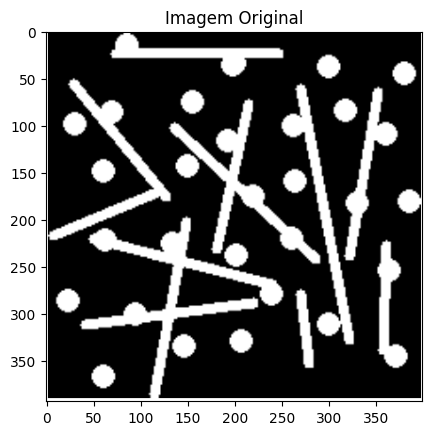

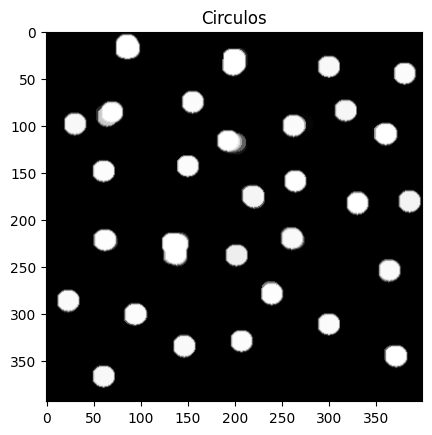

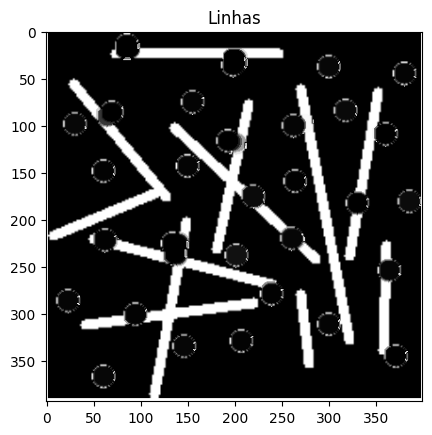

True

In [25]:
imgCirRetas = cv2.imread("figs/circulos_retas.png")

elemEstrut = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))

#Erosao
imgErosao = cv2.erode(imgCirRetas, elemEstrut)

#Abertura
imgAbertura = cv2.dilate(imgErosao, elemEstrut)

#Subtracao
imgSubtracao = imgCirRetas - imgAbertura


plt.imshow(imgCirRetas, 'gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.show()

plt.imshow(imgAbertura, 'gray', vmin=0, vmax=255)
plt.title('Circulos')
plt.show()

plt.imshow(imgSubtracao, 'gray', vmin=0, vmax=255)
plt.title('Linhas')
plt.show()

if imgAbertura.dtype != 'uint8':
    imgAbertura = cv2.convertScaleAbs(imgAbertura)

if imgSubtracao.dtype != 'uint8':
    imgSubtracao = cv2.convertScaleAbs(imgSubtracao)


cv2.imwrite('figs_resultado/circulo.png', imgAbertura)
cv2.imwrite('figs_resultado/linha.png', imgSubtracao)

----
## Exercicio 7

Com base nas noções de vizinhança, adjacência e componentes conexos ensinados na disciplina, crie uma função que receba uma imagem com cores preto e branco e conte quando objetos brancos existem nela. Considere uma conectividade-4. 

Teste sua função na imagem **figs/circles.png**

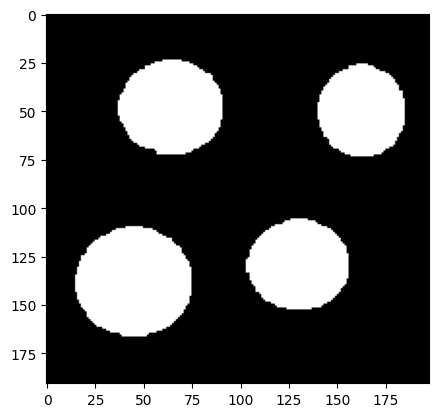


O número de objetos brancos na imagem é: 4


In [17]:
img1 = cv2.imread('figs/circles.png')

def contar_objetos(image_path):
    # Carregar a imagem em escala de cinza
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Thresholding para binarizar a imagem
    _, binarizacao = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Encontrar os componentes conexos
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binarizacao, connectivity=4)

    # O número de componentes é o número de objetos brancos (incluindo o fundo preto)
    num_objetos = len(stats)

    # Subtrair 1 para desconsiderar o fundo preto
    return num_objetos - 1

# Testar a função com a imagem 'circles.png'
caminho_imagem = 'figs/circles.png'

num_objetos = contar_objetos(caminho_imagem)

plt.imshow(img1)
plt.show()

print(f'\nO número de objetos brancos na imagem é: {num_objetos}')

----
## Exercicio 8

Extraia os contornos da rachadura da imagem **figs/rachadura.jpg**. Para isso, é permitido aplicar apenas as seguintes operações: alguma técnica de segmentação, alguma técnica de limiarização automática e algum filtro. 
 - Limite-se aos métodos ensinados na disciplina
 
O resultado mínimo esperado é apresentado na imagem **figs_resultado/rachadura_contorno.png**

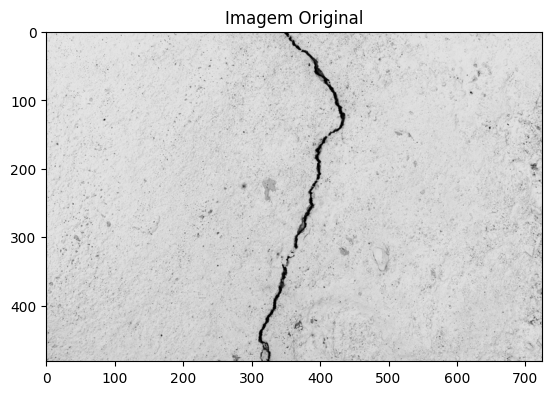

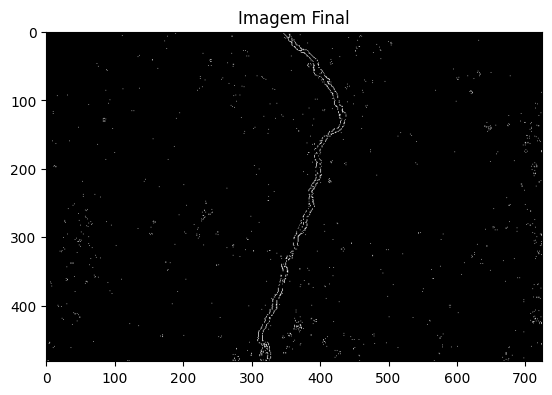

In [26]:
imgRachadura = cv2.imread('figs/rachadura.jpg', 0)

mask = np.array([[-1, -1, -1],
                 [-1,  8, -1],
                 [-1, -1, -1],])

imgSeg1 = cv2.filter2D(imgRachadura, ddepth = -1, kernel = mask)

limiar = 200
imgSeg2 = imgSeg1.copy()
imgSeg2[imgSeg2>limiar] = 255
imgSeg2[imgSeg2<=limiar] = 0

if imgSeg2.dtype != 'uint8':
    imgSeg2 = cv2.convertScaleAbs(imgSeg2)


plt.imshow(imgRachadura, 'gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.show()

plt.imshow(imgSeg2, 'gray', vmin=0, vmax=255)
plt.title('Imagem Final')
plt.show()